In [1]:
print("HEllo")


HEllo


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Check if the file path exists for the initial video
import os
# home
print("file exists?", os.path.exists("C:/Users/Misha/OneDrive - University of Sussex/FYP/Participants/Participant_6/Processed_data/Video/Subject_06_01.mp4"))
# uni
# print("file exists?", os.path.exists("C:/Users/men22/OneDrive - University of Sussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4"))


file exists? True


In [8]:
# Check if the video can be read using opencv
# home
video = cv2.VideoCapture('C:/Users/Misha/OneDrive - University of Sussex/FYP/Participants/Participant_6/Processed_data/Video/Subject_06_01.mp4')
# uni
# video = cv2.VideoCapture("C:/Users/men22/OneDrive - University of Sussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4")
type(video)
# /Users/misheton/Library/CloudStorage/OneDrive-UniversityofSussex/FYP/Participants/Participant_12/Processed_data/Video/Subject_12_01.mp4

cv2.VideoCapture

Get all the frames in frames

In [9]:
frames = []
#frames = np.array(frames)
path = "C:/Users/Misha/OneDrive - University of Sussex/FYP/Participants/Participant_6/Processed_data/Video/Subject_06_01.mp4"
cap = cv2.VideoCapture(path)
ret = True
while ret:
    # ret, frame = cap.read()
    # (height, width) = frame.shape[:2]
    # sky = frame[150:500, 600:900]
    # cv2.imshow('Video', sky)
  ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
  if ret:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frames.append(gray)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)

In [10]:
# Cut the video to only show the mouth properties - cut around the mouth
video = video[:, 150:500, 600:900]
video.shape

(1791, 350, 300)

1 in 6 frames - done
simple 
cut video around the mouth - done
properties - how well can predict
and how smooth it is


calculate the gradient of the optical flow in x and y
first derivative - how quickly is the flow field changing in direction x

0


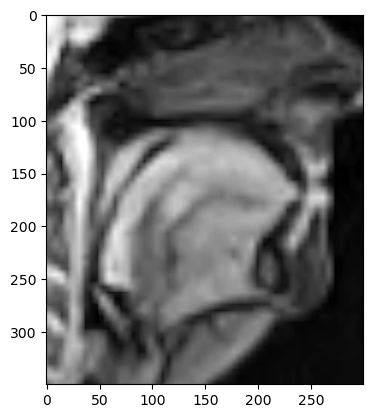

6


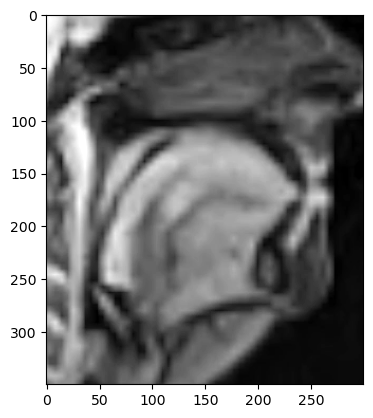

12


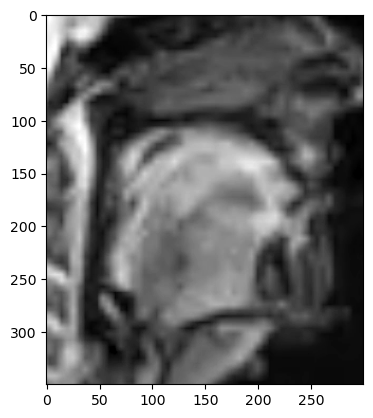

18


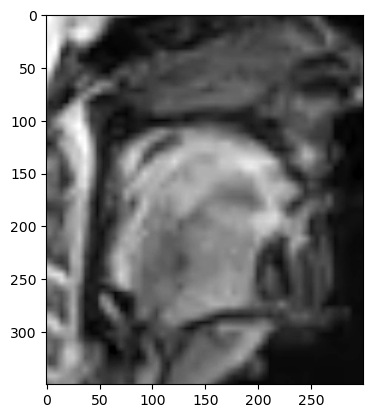

24


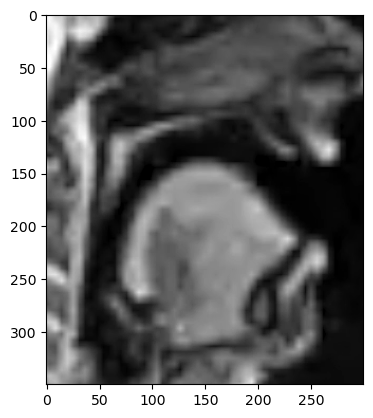

30


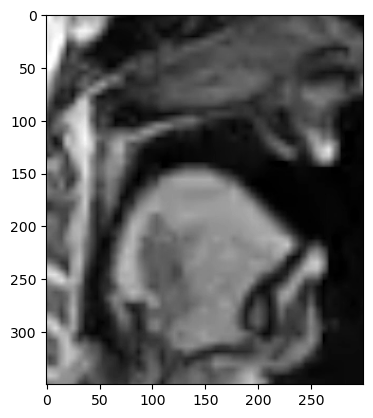

36


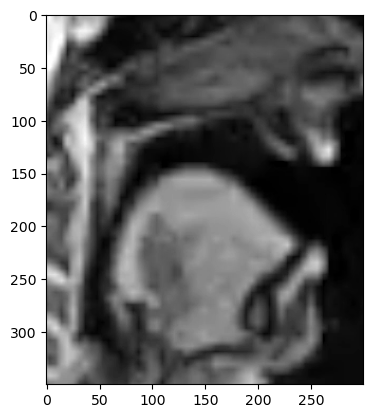

42


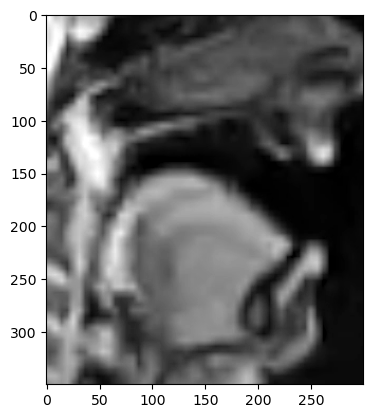

48


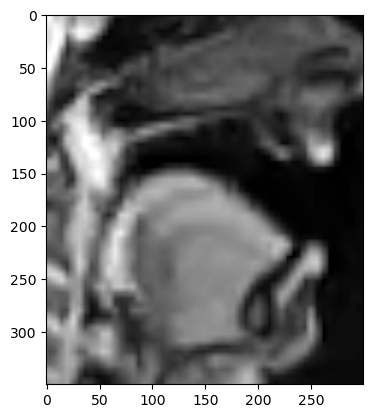

54


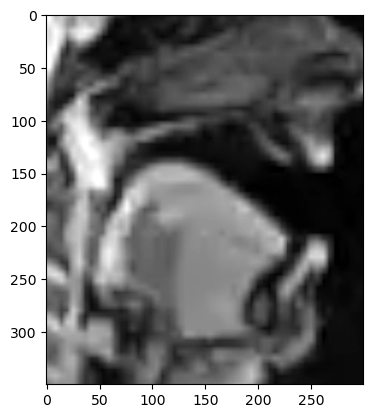

60


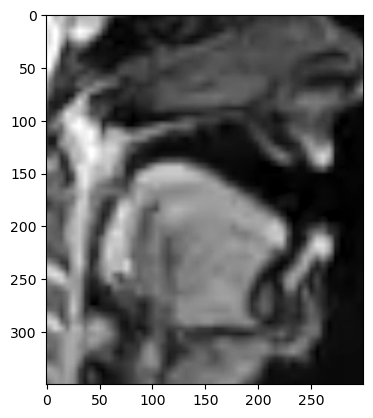

66


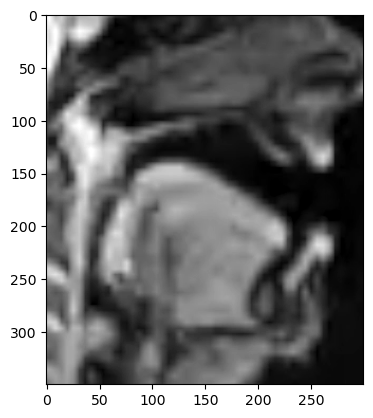

72


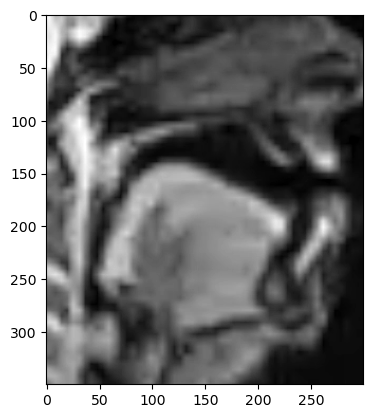

78


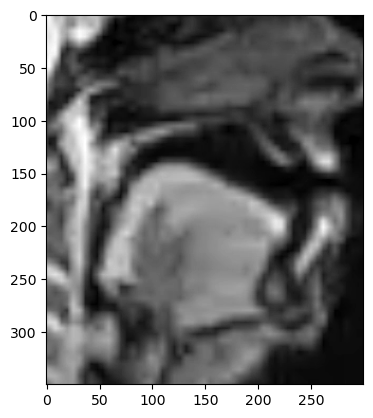

84


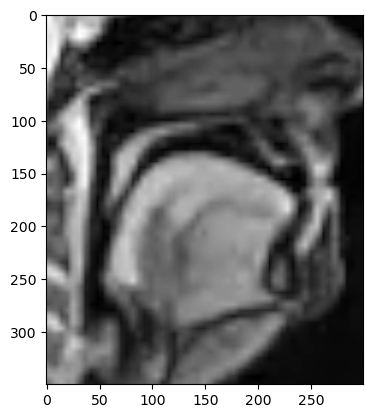

90


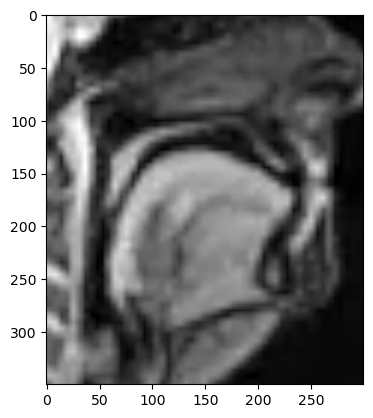

96


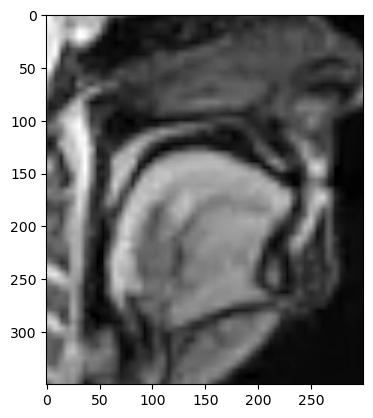

In [12]:
# Display the resulting frames - 1 in 6 frames as there isn't movement for every frame
for i in range(0,100,6):
  print(i)
  plt.imshow(video[i], cmap='gray')
  plt.show()

CV Lab Tracking - Lucas-Kanade
- works best in slow motion




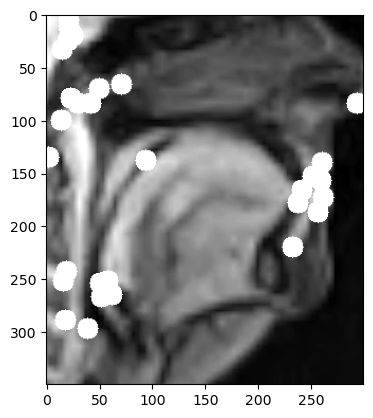

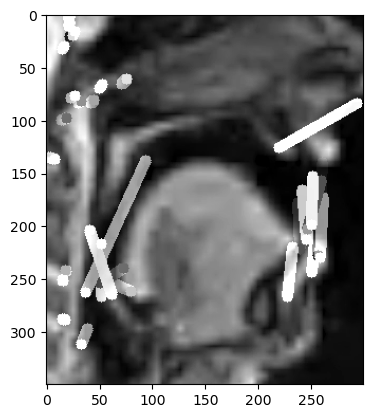

(<matplotlib.image.AxesImage at 0x10ee1af6fd0>, None)

In [13]:
feature_params = dict(maxCorners = 30, qualityLevel = 0.2, minDistance = 6, blockSize = 7)
p0 = cv2.goodFeaturesToTrack(video[0,...],mask = None, **feature_params)
color = np.random.randint(0,255,(100,3))
frame_start = 0
frame0 = np.copy(video[frame_start,...])
frame_end = 24
for i in p0:
    x,y = i.ravel()
    cv2.circle(frame0,(int(x),int(y)),10,(255,0,255),-1)
plt.imshow(frame0, cmap='gray'),plt.show()

lk_params = dict( winSize  = (30,30),
                  maxLevel = 5,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
mask = np.zeros_like(frame0)
frame = np.copy(video[frame_end,...])
p1, st, err = cv2.calcOpticalFlowPyrLK(video[0,...], video[frame_end,...], p0, None, **lk_params)
good_new = p1[st==1]
good_old = p0[st==1]
# draw the tracks
for i,(new,old) in enumerate(zip(good_new, good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 10)
    frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
img = cv2.add(frame,mask)

plt.imshow(img, cmap='gray'), plt.show()

# plt.imshow(video[frame_start,...], cmap='gray'), plt.show()
# plt.imshow(video[frame_end,...], cmap='gray'), plt.show()


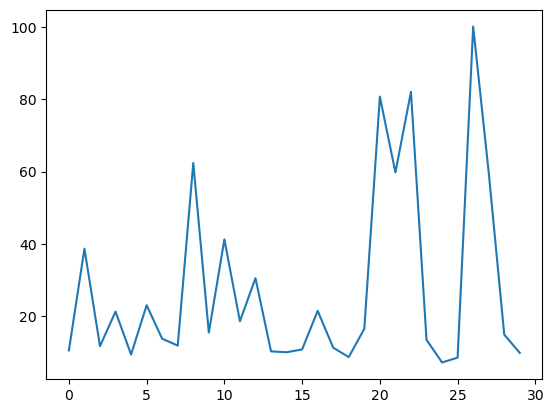

In [14]:
plt.plot(err)

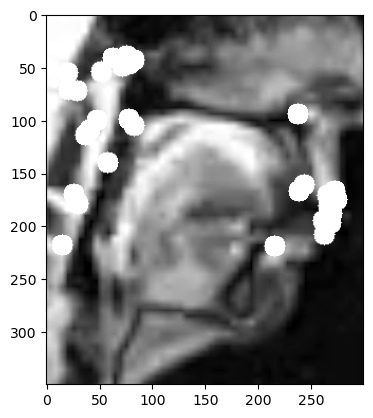

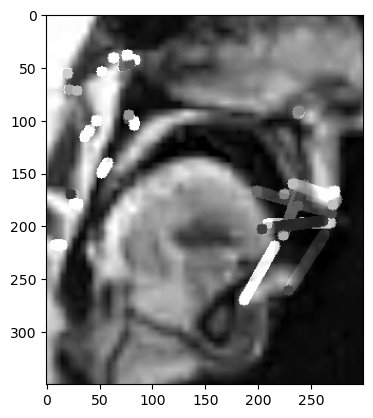

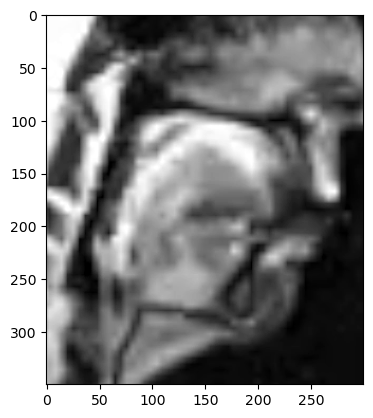

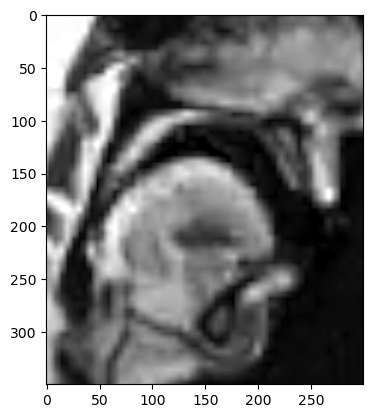

(<matplotlib.image.AxesImage at 0x266624f99a0>, None)

In [ ]:
# p0 = cv2.goodFeaturesToTrack(video[39,...],1000, 0.15, 30)
# color = np.random.randint(0,255,(100,3))
frame_start = 63
frame0 = np.copy(video[frame_start,...])
frame_end = 80
for i in p0:
    x,y = i.ravel()
    cv2.circle(frame0,(int(x),int(y)),10,(255,0,255),-1)
plt.imshow(frame0, cmap='gray'),plt.show()

lk_params = dict( winSize  = (30,30),
                  maxLevel = 5,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
mask = np.zeros_like(frame0)
frame = np.copy(video[frame_end,...])
p1, st, err = cv2.calcOpticalFlowPyrLK(video[39,...], video[frame_end,...], p0, None, **lk_params)
good_new = p1[st==1]
good_old = p0[st==1]
# draw the tracks
for i,(new,old) in enumerate(zip(good_new, good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 10)
    frame = cv2.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
img = cv2.add(frame,mask)

plt.imshow(img, cmap='gray'), plt.show()

plt.imshow(video[frame_start,...], cmap='gray'), plt.show()
plt.imshow(video[frame_end,...], cmap='gray'), plt.show()

Dense Optical Flow

In [15]:
frames = []
#frames = np.array(frames)
path = "C:/Users/Misha/OneDrive - University of Sussex/FYP/Participants/Participant_6/Processed_data/Video/Subject_06_01.mp4"
cap = cv2.VideoCapture(path)
ret = True
while ret:
    # ret, frame = cap.read()
    # (height, width) = frame.shape[:2]
    # sky = frame[150:500, 600:900]
    # cv2.imshow('Video', sky)
  ret, img = cap.read() # read one frame from the 'capture' object; img is (H, W, C)
  if ret:
    # gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frames.append(img)
video = np.stack(frames, axis=0) # dimensions (T, H, W, C)

In [16]:
video = video[:, 150:500, 600:900]
video.shape

(1791, 350, 300, 3)

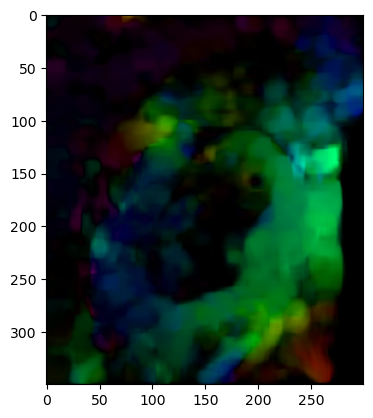

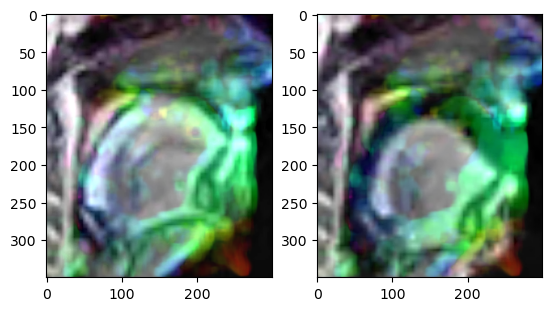

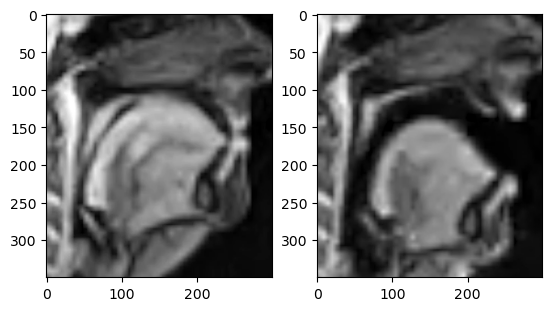

In [17]:
frame_start = 0
frame0 = np.copy(video[frame_start,...,:])
frame_end = 24   

mask = np.zeros_like(frame0)
# print(mask.shape)
# Sets image saturation to maximum
mask[..., 1] = 255

frame = np.copy(video[frame_end,...])

prev_gray = cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prev_gray,
                                    gray,
                                    None,
                                    pyr_scale = 0.5,
                                    levels = 3,
                                    winsize = 10,           
                                    iterations = 6,
                                    poly_n = 5,
                                    poly_sigma = 1.2,
                                    flags = 0)
# (	InputArray prev,
# InputArray next,
# InputOutputArray flow = computed flow image that has the same size as prev and type CV_32FC2,
# double pyr_scale - parameter, specifying the image scale (<1) to build pyramids for each image; 
# pyr_scale=0.5 means a classical pyramid, where each next layer is twice smaller than the previous one.,
# int 	levels - number of pyramid layers including the initial image; levels=1 means that no extra layers are created and only the original images are used.,
# int 	winsize - averaging window size; larger values increase the algorithm robustness to image noise and give more chances for fast motion detection, 
# but yield more blurred motion field.,
# int 	iterations - number of iterations the algorithm does at each pyramid level.,
# int 	poly_n - size of the pixel neighborhood used to find polynomial expansion in each pixel; larger values mean that 
# the image will be approximated with smoother surfaces, yielding more robust algorithm and more blurred motion field, typically poly_n =5 or 7,
# double 	poly_sigma - standard deviation of the Gaussian that is used to smooth derivatives used as a basis for the polynomial expansion; 
# for poly_n=5, you can set poly_sigma=1.1, for poly_n=7, a good value would be poly_sigma=1.5,
# int 	flags 
# )

# Computes the magnitude and angle of the 2D vectors
magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
# Sets image hue according to the optical flow direction
# print(angle.shape)
# print(mask[..., 0])
mask[..., 0] = angle * 180 / np.pi / 2
# Sets image value according to the optical flow magnitude (normalized)
mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
# print(mask)

# Converts HSV to RGB (BGR) color representation
rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
# Opens a new window and displays the output frame
# cv2.imshow("dense optical flow", rgb)

frame1 = np.copy(video[frame_start,...])
img1 = cv2.add(frame1,rgb)

frame2 = np.copy(video[frame_end,...])
img2 = cv2.add(frame2,rgb)
plt.imshow(rgb), plt.show()
plt.subplot(1,2,1)
# plt.imshow(rgb), plt.show()
plt.imshow(img1, cmap= 'gray')
plt.subplot(1,2,2)
# plt.imshow(rgb)
plt.imshow(img2, cmap= 'gray')
plt.show()

plt.subplot(1,2,1)
plt.imshow(video[frame_start,...,:], cmap='gray')
plt.subplot(1,2,2)
plt.imshow(video[frame_end,..., :], cmap='gray')
plt.show()


In [18]:
def draw_flow(img, flow, step=16):
        h, w = img.shape[:2]
        y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1).astype(int)
        fx, fy = flow[y,x].T
        lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)
        lines = np.int32(lines + 0.5)
        vis = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
        cv2.polylines(vis, lines, 0, (0, 255, 0))
        for (x1, y1), (_x2, _y2) in lines:
            cv2.circle(vis, (x1, y1), 1, (0, 255, 0), -1)
        return vis

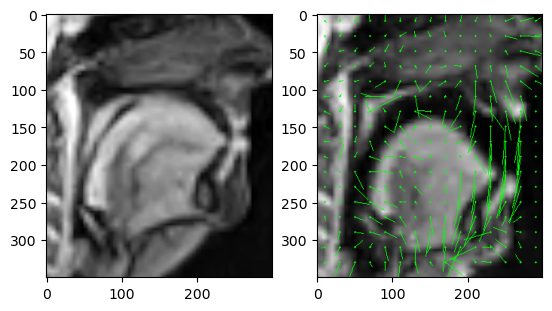

In [19]:
plt.subplot(1,2,1)
plt.imshow(prev_gray, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(draw_flow(gray, flow, 20))
plt.show()

In [20]:
def draw_hsv(flow):
    h, w = flow.shape[:2]
    fx, fy = flow[:,:,0], flow[:,:,1]
    ang = np.arctan2(fy, fx) + np.pi
    v = np.sqrt(fx*fx+fy*fy)
    hsv = np.zeros((h, w, 3), np.uint8)
    hsv[...,0] = ang*(180/np.pi/2)
    hsv[...,1] = 255
    hsv[...,2] = np.minimum(v*4, 255)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return bgr
   
    
def warp_flow(img, flow):
   h, w = flow.shape[:2]
   flow = -flow #getting next from previous - if the opposite - getting previous from current - need to invert the flow
   flow[:,:,0] += np.arange(w)
   flow[:,:,1] += np.arange(h)[:,np.newaxis]
   res = cv2.remap(img, flow, None, cv2.INTER_LINEAR)
   return res

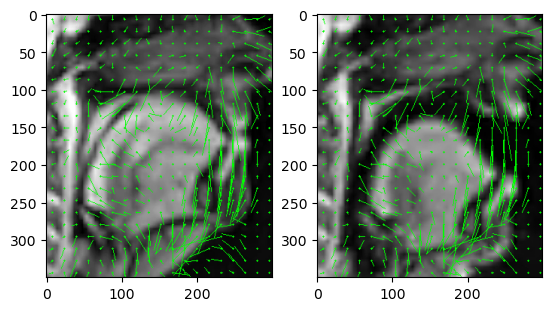

In [21]:
plt.subplot(1,2,1)
plt.imshow(draw_flow(prev_gray, flow))
plt.subplot(1,2,2)
plt.imshow(draw_flow(gray, flow))
plt.show()

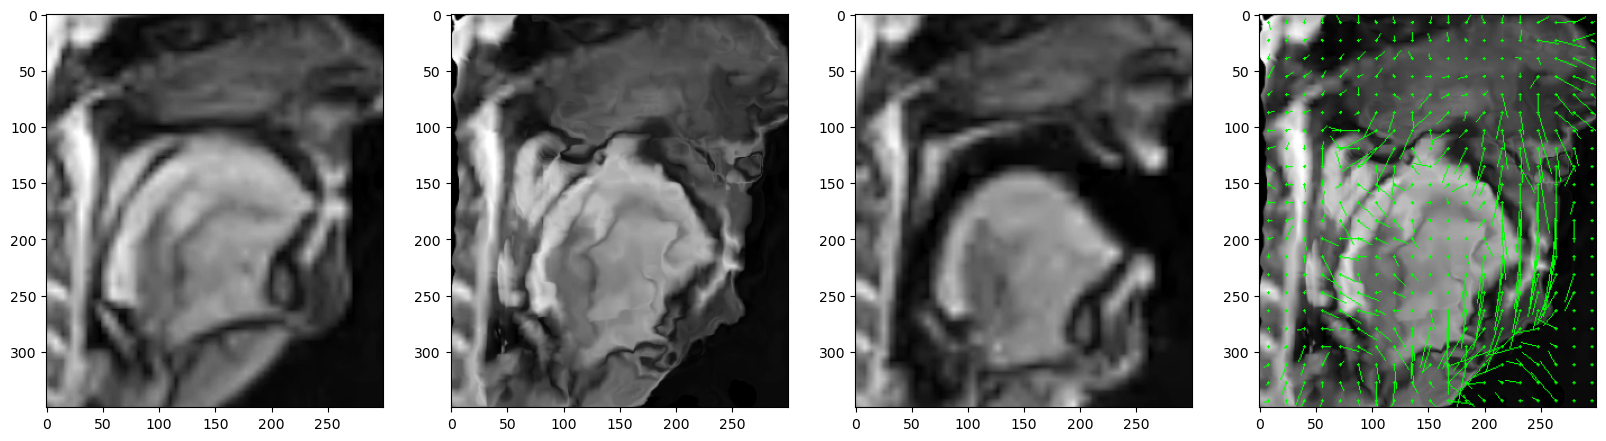

In [22]:
# plt.imshow(draw_flow(gray, flow))
# plt.show()
fig, ax = plt.subplots(1, 4, figsize=(20,7))
plt.subplot(1,4,1)
plt.imshow(prev_gray, cmap='gray')
plt.subplot(1,4,2)
warped = warp_flow(prev_gray, flow) # getting next from previous 
plt.imshow(warped, cmap='gray')
plt.subplot(1,4,3)
plt.imshow(gray, cmap='gray')
plt.subplot(1,4,4)
plt.imshow(draw_flow(warped, flow), cmap='gray')
plt.show()

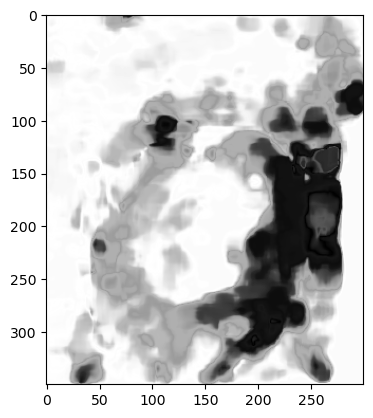

[[251 251 251 ... 251 251 251]
 [251 251 252 ... 251 251 251]
 [251 251 254 ... 251 251 251]
 ...
 [254 254 254 ... 251 251 251]
 [254 255 255 ... 251 251 251]
 [251 252 253 ... 251 251 251]]


In [23]:
mapped_img = cv2.remap(prev_gray, magnitude, magnitude, cv2.INTER_LINEAR)
plt.imshow(mapped_img, cmap = "gray")
plt.show()
print(mapped_img)

In [ ]:
mask1 = np.zeros_like(frame1)
map1, map2 = cv2.convertMaps(magnitude, angle, dstmap1type = "CV_16SC2")
mapped_img = cv2.remap(frame1, map1, map2, cv2.INTER_LINEAR)
plt.imshow(mapped_img)
plt.show()

In [ ]:
# print(mask.shape)
# mask1 = mask[..., 0] + mask[..., 2]
# print(mask1.shape)

warp_mat = cv2.getAffineTransform(prev_gray, gray)
rows, cols = prev_gray.shape
dst = cv2.warpAffine(prev_gray, warp_mat, (cols,rows))
# print(mask[..., 2])

In [78]:
a = np.expand_dims(mask[...,0], axis=2)
b = np.expand_dims(mask[...,2], axis=2)
c = np.concatenate([a, b], axis=2)
c.shape

(350, 300, 2)

In [99]:
np.random.seed(0)
img_test = np.uint8(np.random.randn(4, 4)*255)

map_y = np.array([[0, 1], [2, 3]], dtype=np.float32)
map_x = np.array([[5, 6], [7, 10]], dtype=np.float32)
mapped_img = cv2.remap(img_test , map_x, map_y, cv2.INTER_LINEAR)

In [100]:
img_test

array([[193, 102, 249,  59],
       [220,   7, 242, 218],
       [230, 104,  36, 114],
       [194,  31, 113,  85]], dtype=uint8)

Backward Warp - faster

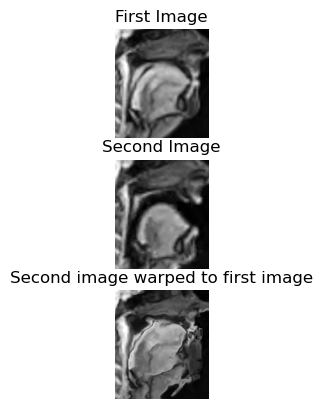

In [24]:
import flowpy

# flow = flowpy.flow_read("static/kitti_occ_000010_10.png")
# first_image = np.asarray(Image.open("static/kitti_000010_10.png"))
# second_image = np.asarray(Image.open("static/kitti_000010_11.png"))

flow[np.isnan(flow)] = 0
warped_first_image = flowpy.backward_warp(prev_gray, flow)

fig, axes = plt.subplots(3, 1)
# fig, ax = plt.subplots(2, 2, figsize=(10,7))
for ax, image, title in zip(axes, (prev_gray, gray, warped_first_image),
                            ("First Image", "Second Image", "Second image warped to first image")):
    ax.imshow(image, cmap = 'gray')
    ax.set_title(title)
    ax.set_axis_off()

plt.show()

Forward Warp - slower 

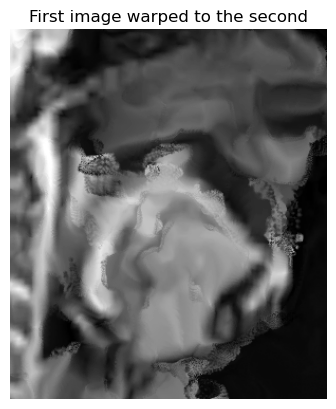

In [26]:
flow[np.isnan(flow)] = 0
warped_second_image = flowpy.forward_warp(prev_gray, flow)

fig, ax = plt.subplots()

ax.imshow(warped_second_image, cmap='gray')
ax.set_title( "First image warped to the second")
ax.set_axis_off()

In [78]:
print(warped_first_image.shape)
print(gray.shape)

(350, 300)
(350, 300)


In [ ]:
import oflibnumpy as of

